# Cross Sell Prediction of Insurance:
* Health Insurance to Vehicle Insurance

In [1]:
# Import the must required librarires....

import pandas as pd
import numpy as np

# import libraries for visuallization of the data....
import seaborn as sns
import matplotlib.pyplot as plt

# import library for statistical analysis....
import scipy.stats as stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

# for splitting the data...
from sklearn.model_selection import train_test_split

# import librarires for modelling purpose...
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# import libraries for model eavaluation....
from sklearn.metrics import roc_auc_score

# import the warnings library for ignoring warnings by that notebook does not look like dense filled..
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from the csv file...
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.shape,train.shape

((127037, 11), (381109, 12))

In [4]:
# combine the train and test data for conducting EDA for both the data...
combined = pd.concat([train,test],ignore_index=False)
combined.shape

(508146, 12)

In [5]:
combined.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
combined.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [7]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
id,508146.0,254073.500000,146689.259281,1.0,127037.25,254073.5,381109.75,508146.0
Age,508146.0,38.808413,15.500179,20.0,25.00,36.0,49.00,85.0
Driving_License,508146.0,0.997936,0.045388,0.0,1.00,1.0,1.00,1.0
Region_Code,508146.0,26.406572,13.224921,0.0,15.00,28.0,35.00,52.0
Previously_Insured,508146.0,0.458667,0.498289,0.0,0.00,0.0,1.00,1.0
Annual_Premium,508146.0,30554.453041,17146.574625,2630.0,24381.00,31661.0,39403.75,540165.0
Policy_Sales_Channel,508146.0,111.975838,54.246027,1.0,26.00,133.0,152.00,163.0
Vintage,508146.0,154.340123,83.668793,10.0,82.00,154.0,227.00,299.0
Response,381109.0,0.122563,0.327936,0.0,0.00,0.0,0.00,1.0


In [8]:
cats = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel','Response']
nums = ['Age','Annual_Premium','Vintage']

In [9]:
combined = combined.drop(columns='id')
combined.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [10]:
combined[cats].describe()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,0.997936,26.406572,0.458667,111.975838,0.122563
std,0.045388,13.224921,0.498289,54.246027,0.327936
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,15.000000,0.000000,26.000000,0.000000
50%,1.000000,28.000000,0.000000,133.000000,0.000000
75%,1.000000,35.000000,1.000000,152.000000,0.000000
max,1.000000,52.000000,1.000000,163.000000,1.000000


### Univariate Analysis:

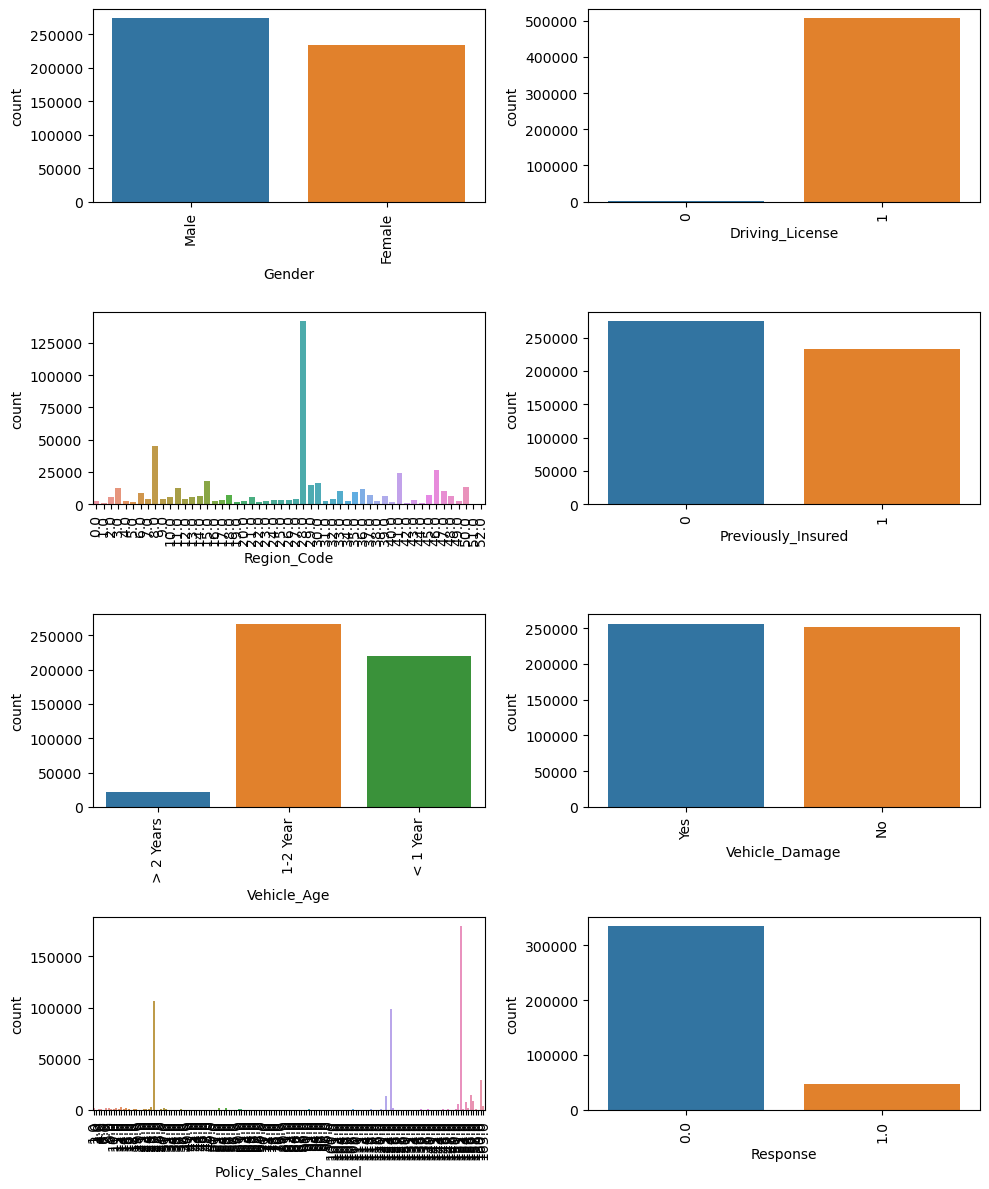

In [11]:
# visualise the categorical columns....
plt.figure(figsize=(10,12))
t = 1
for i in cats:
    plt.subplot(4,2,t)
    sns.countplot(x=combined[i])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
combined.Driving_License.unique()

array([1, 0], dtype=int64)

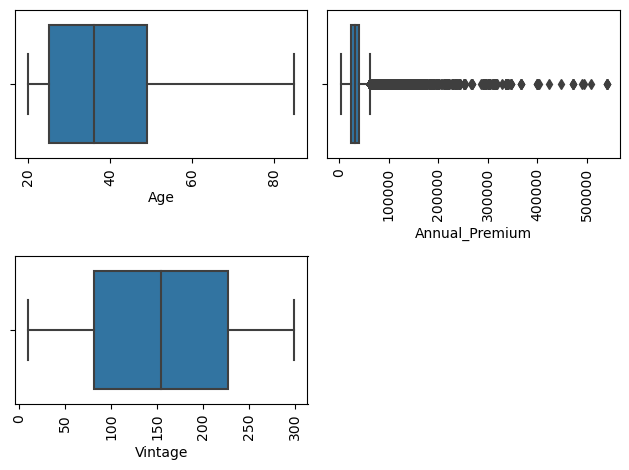

In [13]:
# visualise the numerical columns....
t = 1
for i in nums:
    plt.subplot(2,2,t)
    sns.boxplot(x=combined[i])
    t +=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
for i in cats:
    print(combined[i].value_counts())
    print('------------------------')

Male      274325
Female    233821
Name: Gender, dtype: int64
------------------------
1    507097
0      1049
Name: Driving_License, dtype: int64
------------------------
28.0    141937
8.0      44900
46.0     26357
41.0     24400
15.0     17750
30.0     16276
29.0     14843
50.0     13657
3.0      12349
11.0     12328
36.0     11696
33.0     10307
47.0      9942
35.0      9309
6.0       8351
45.0      7543
37.0      7343
18.0      6903
48.0      6274
14.0      6249
39.0      6138
10.0      5847
21.0      5671
2.0       5398
13.0      5396
7.0       4313
12.0      4235
9.0       4084
32.0      3745
27.0      3711
43.0      3508
26.0      3461
17.0      3455
25.0      3352
24.0      3263
16.0      2727
0.0       2699
38.0      2677
31.0      2635
23.0      2596
20.0      2528
49.0      2388
4.0       2379
34.0      2190
19.0      2059
22.0      1729
40.0      1708
5.0       1698
1.0       1363
44.0      1064
42.0       787
52.0       357
51.0       271
Name: Region_Code, dtype: int64
--

### Bivariate Analysis:

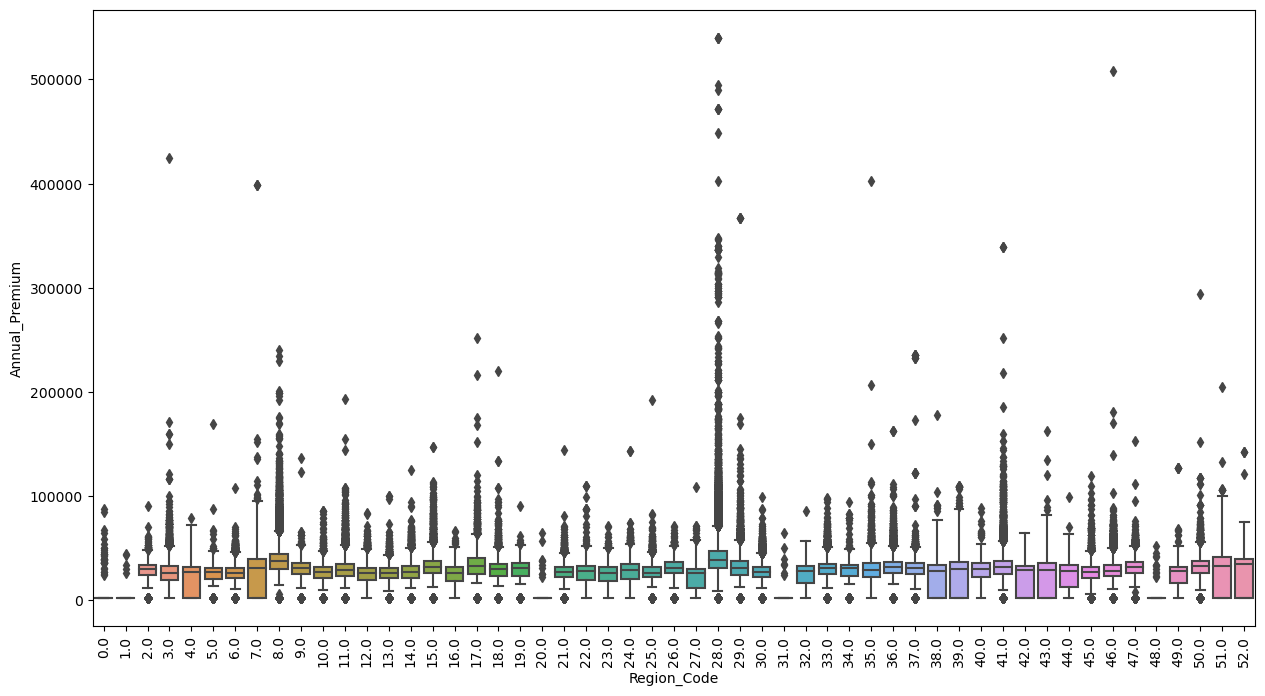

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x=combined['Region_Code'],y=combined['Annual_Premium'])
plt.xticks(rotation=90)
plt.show()

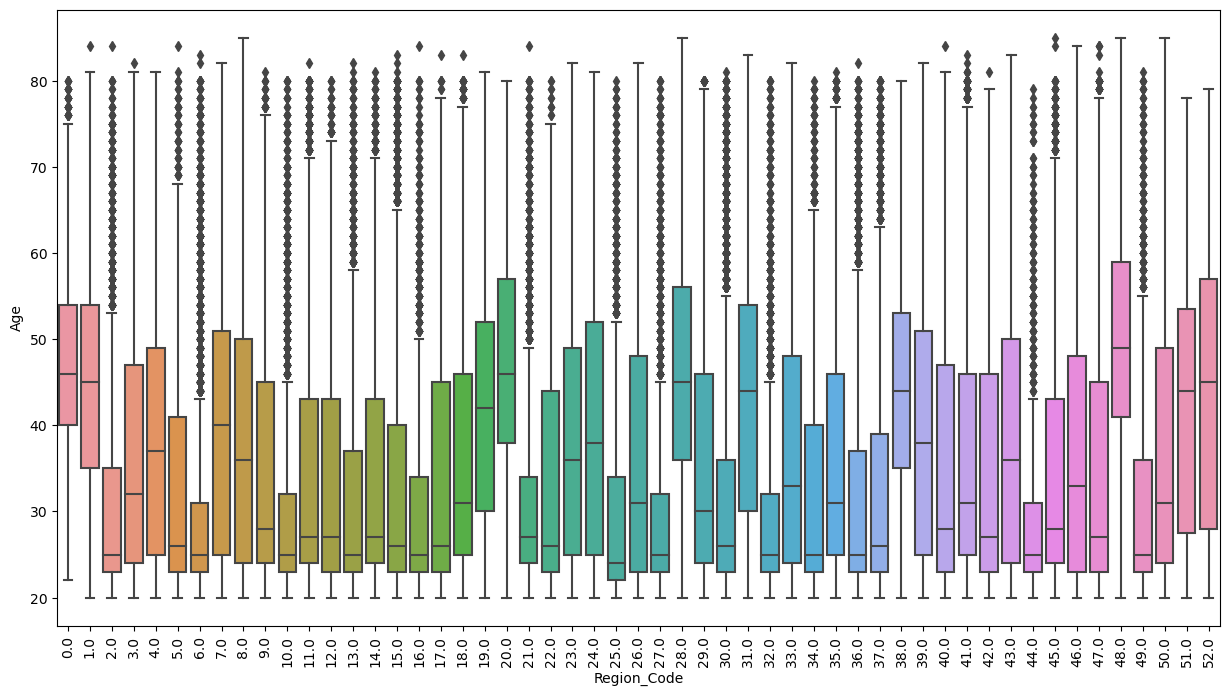

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x=combined['Region_Code'],y=combined['Age'])
plt.xticks(rotation=90)
plt.show()

In [17]:
combined.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


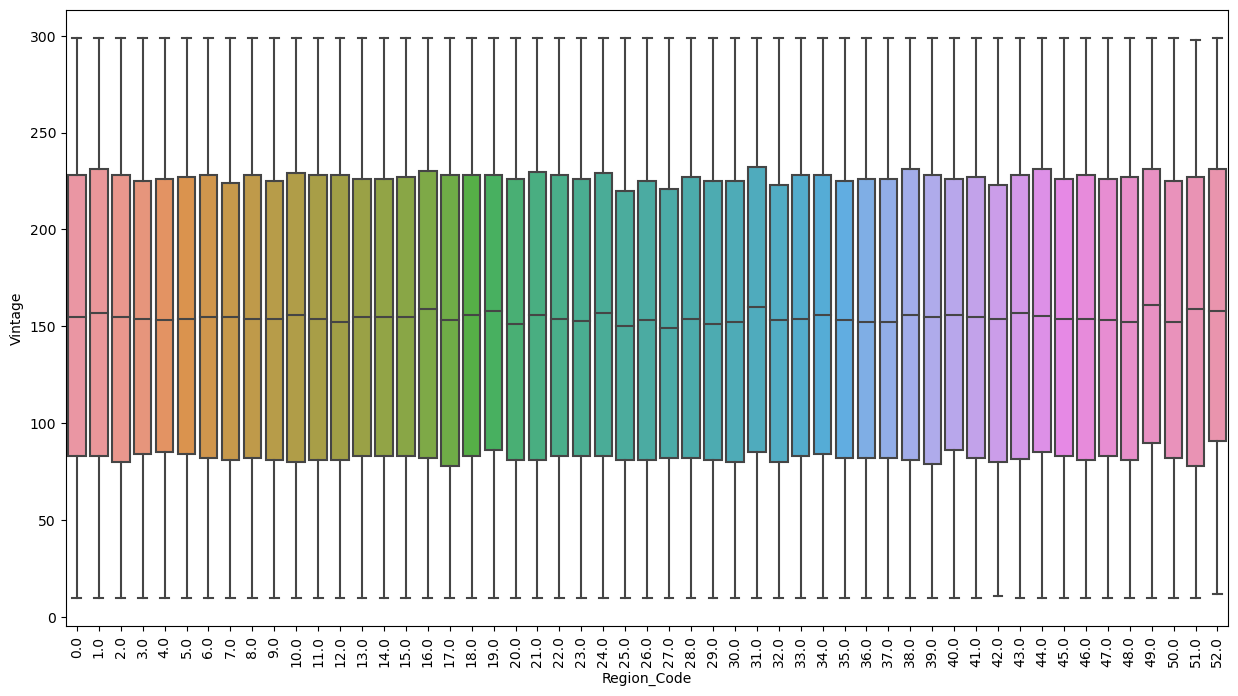

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x=combined['Region_Code'],y=combined['Vintage'])
plt.xticks(rotation=90)
plt.show()

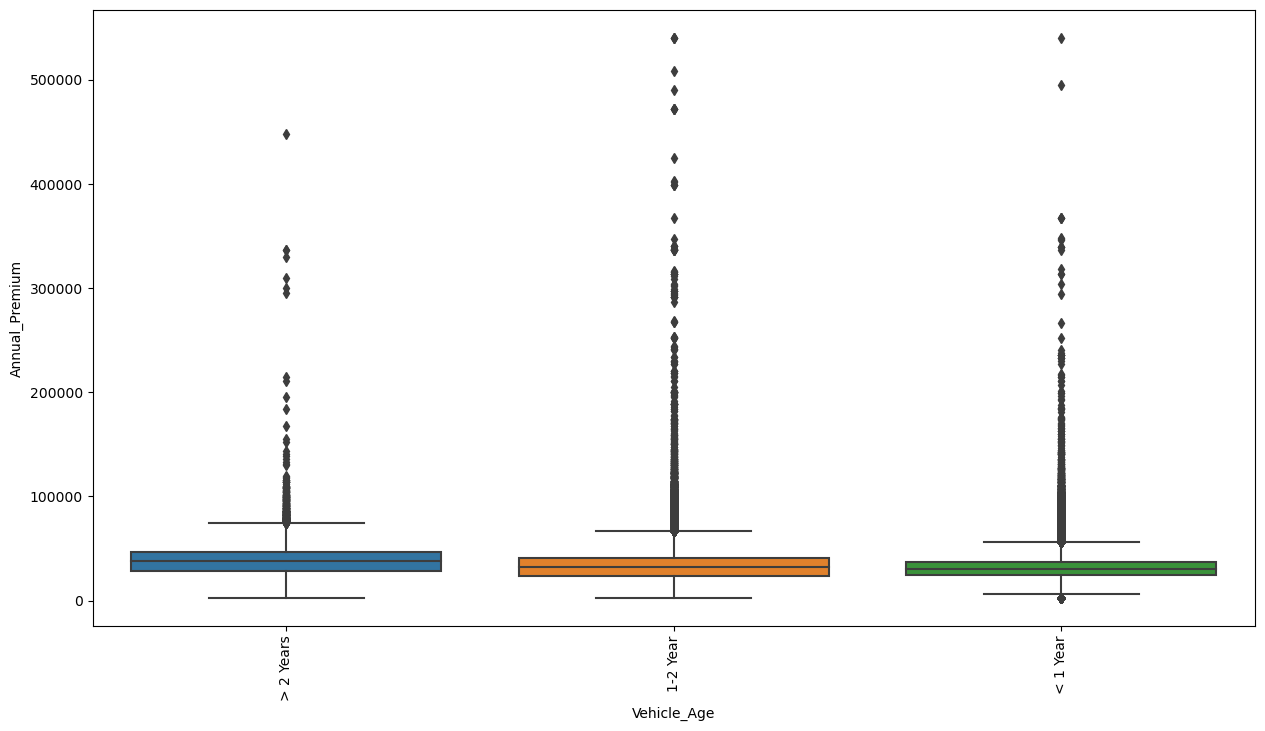

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x=combined['Vehicle_Age'],y=combined['Annual_Premium'])
plt.xticks(rotation=90)
plt.show()

In [20]:
combined.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


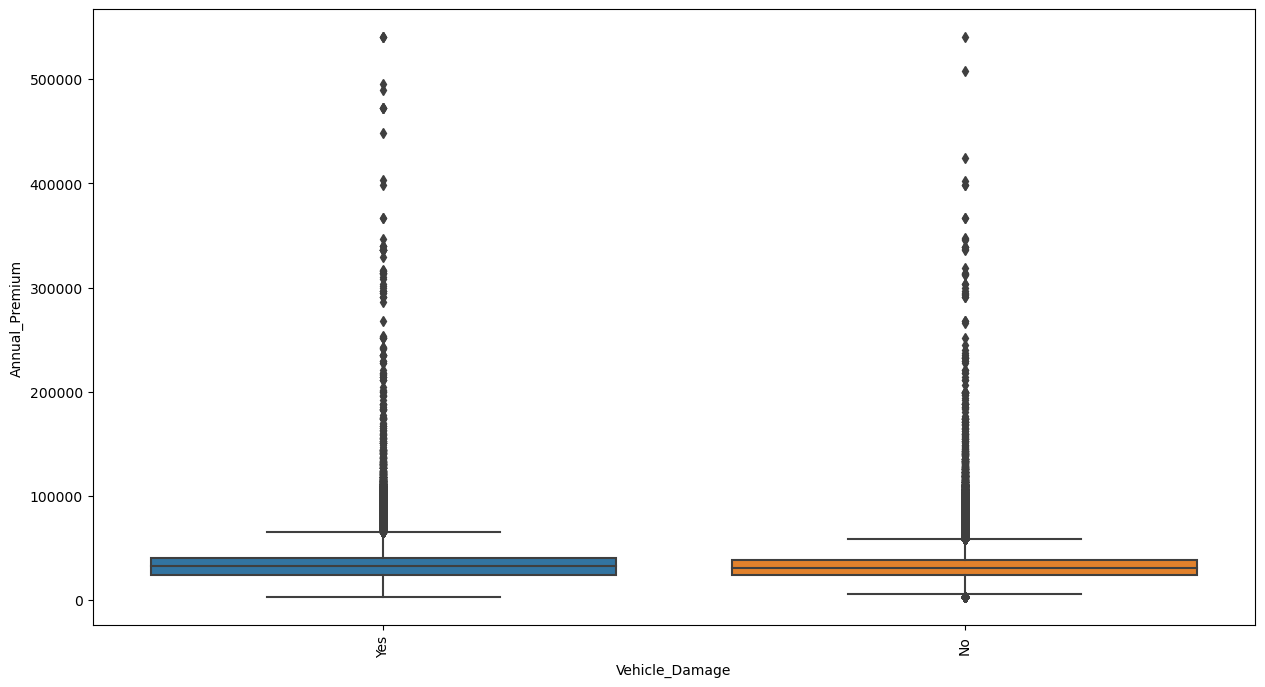

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x=combined['Vehicle_Damage'],y=combined['Annual_Premium'])
plt.xticks(rotation=90)
plt.show()

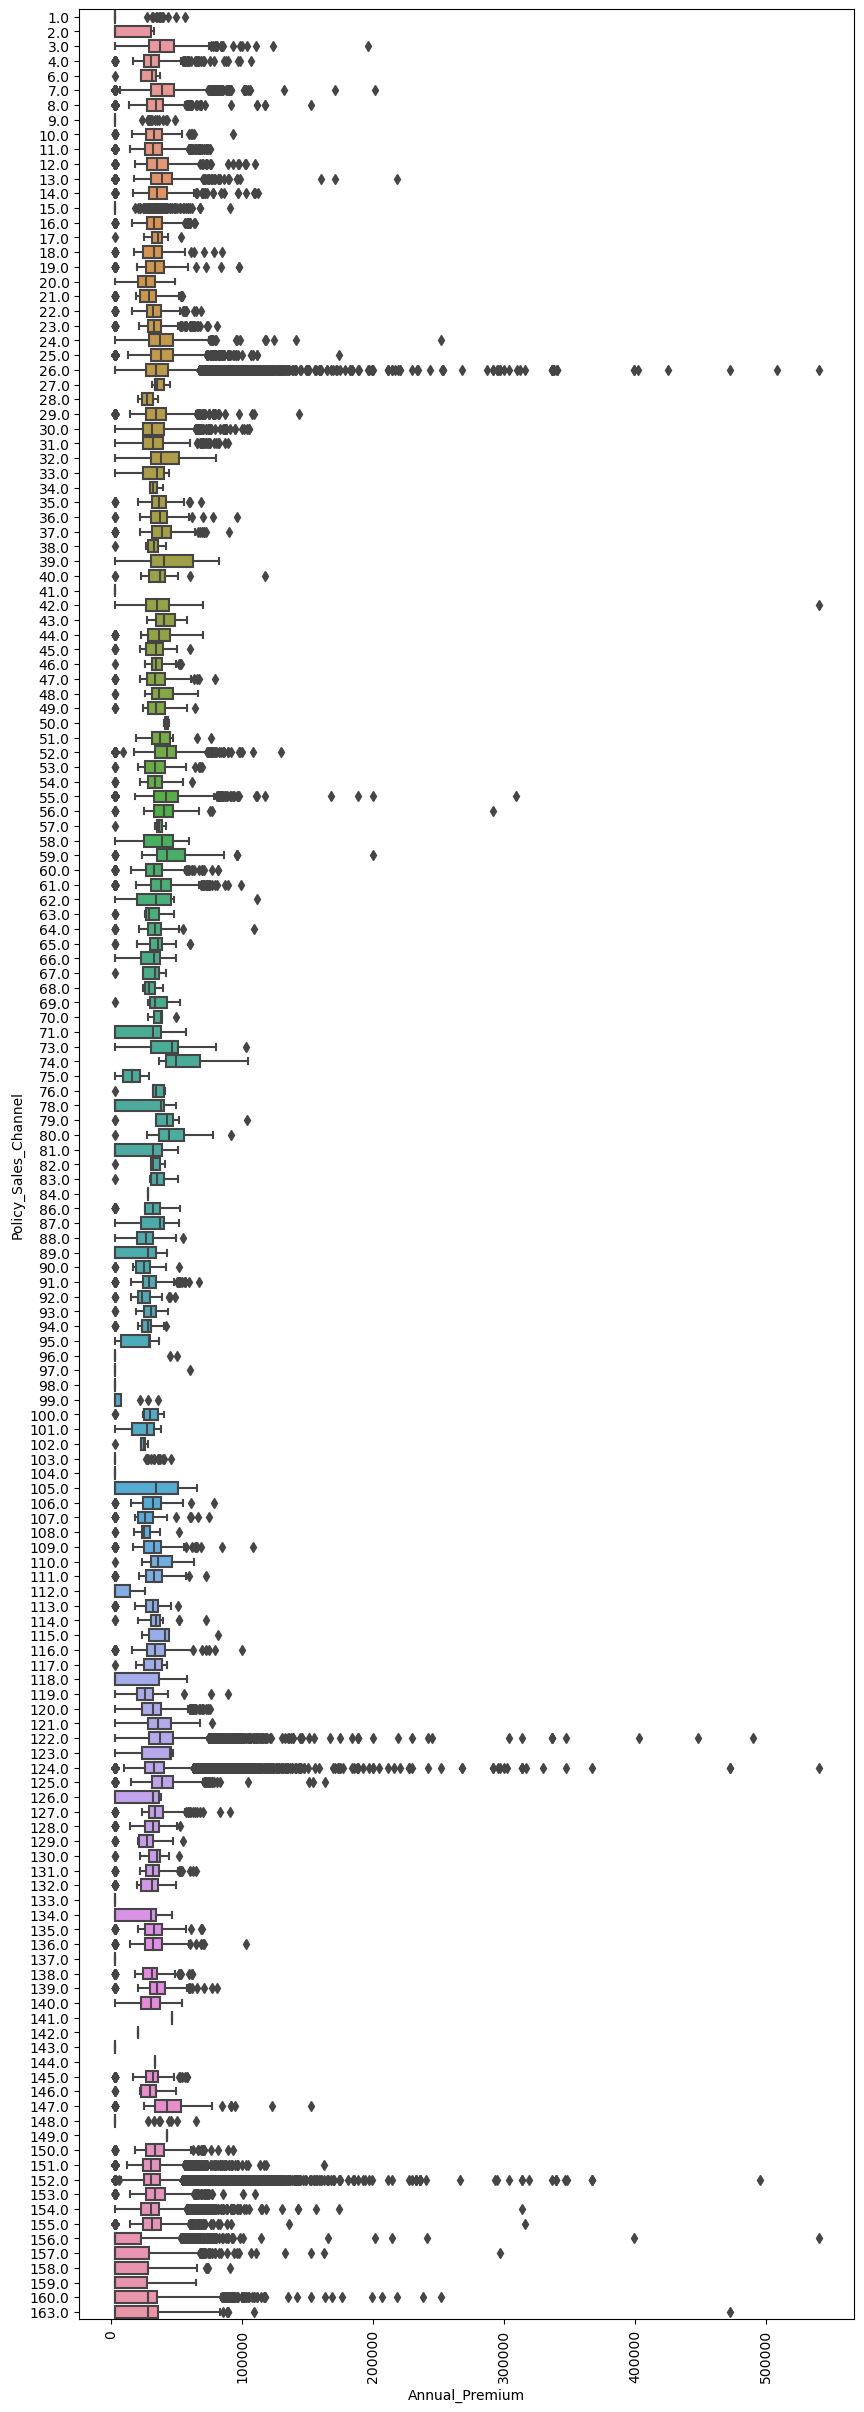

In [22]:
plt.figure(figsize=(10,30))
sns.boxplot(y=combined['Policy_Sales_Channel'],x=combined['Annual_Premium'],orient='h')
plt.xticks(rotation=90)
plt.show()

In [23]:
combined.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


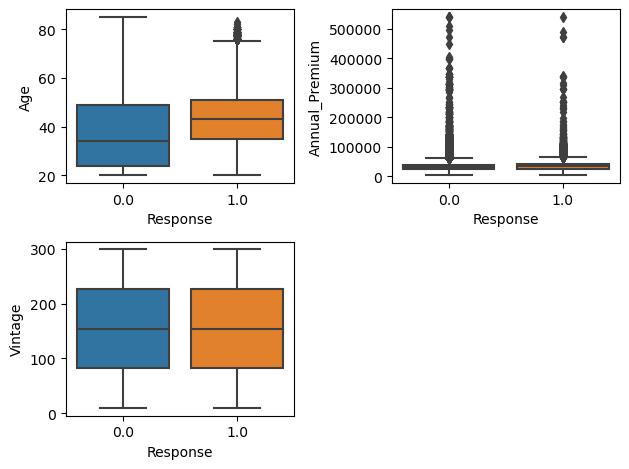

In [24]:
t = 1
for i in nums:
    plt.subplot(2,2,t)
    sns.boxplot(y=combined[i],x = combined['Response'])
    t +=1
plt.tight_layout()
plt.show()

<Axes: xlabel='Gender'>

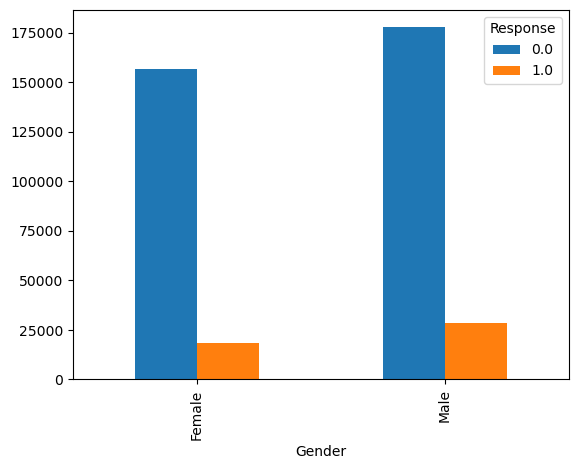

In [25]:
pd.crosstab(combined['Gender'],combined['Response']).plot(kind='bar')

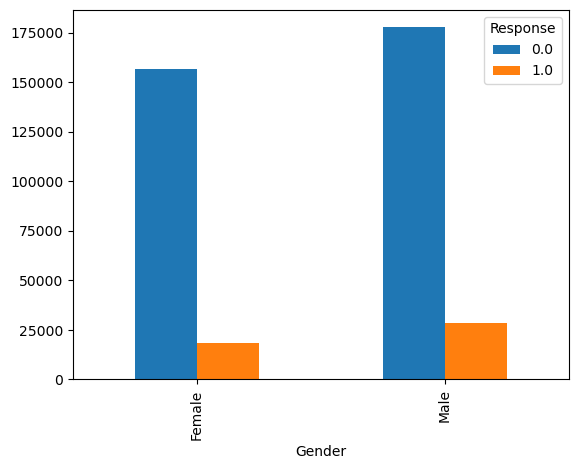

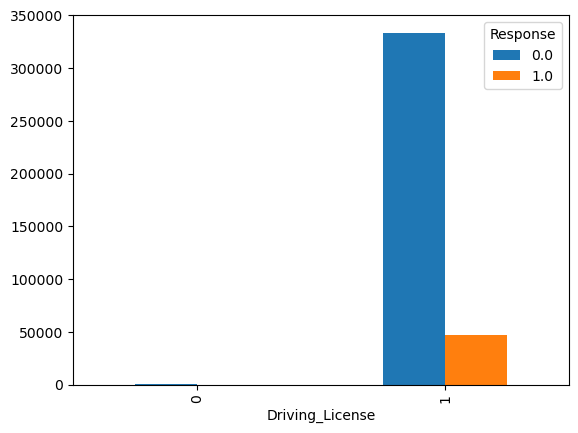

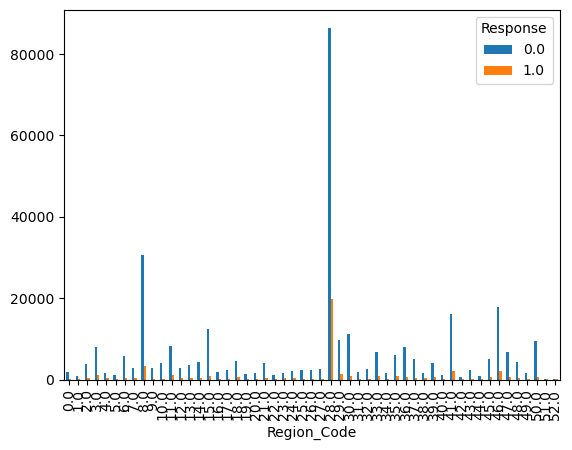

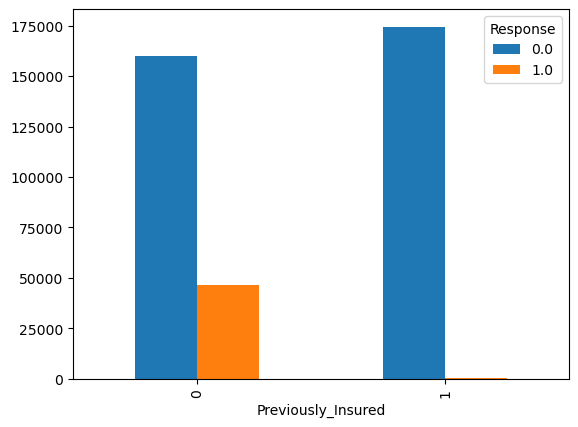

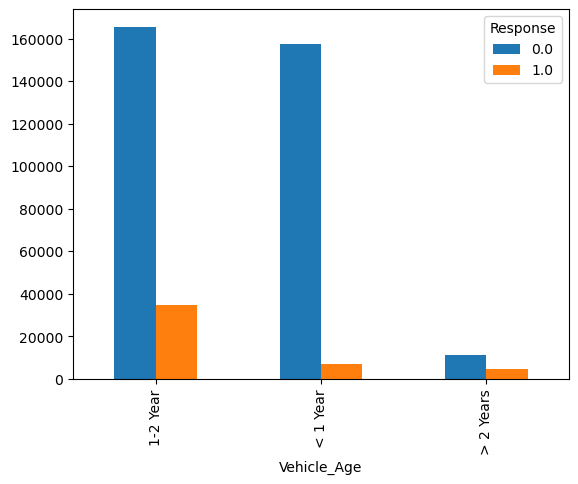

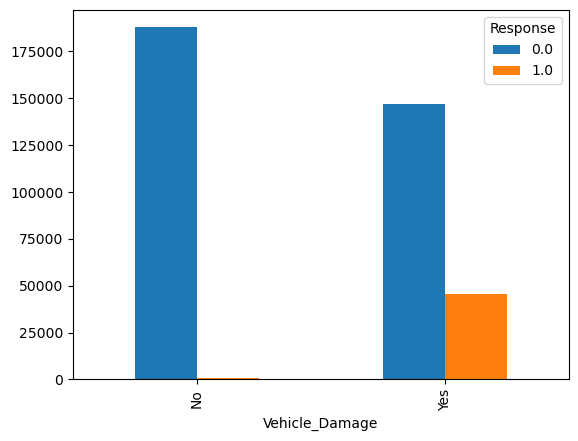

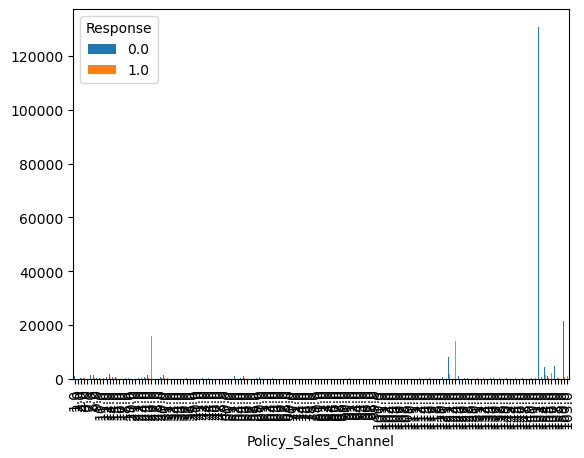

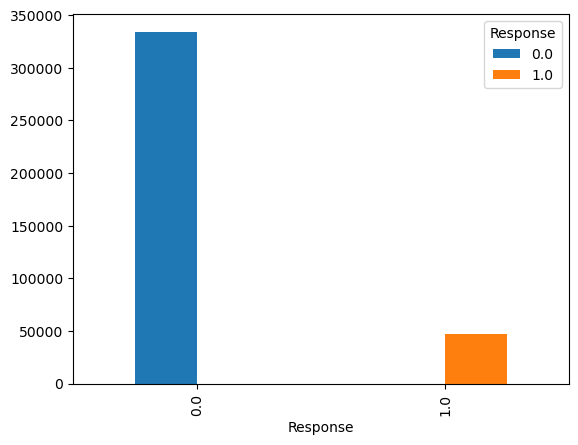

In [26]:
for i in cats:
    pd.crosstab(combined[i],combined['Response']).plot(kind='bar')

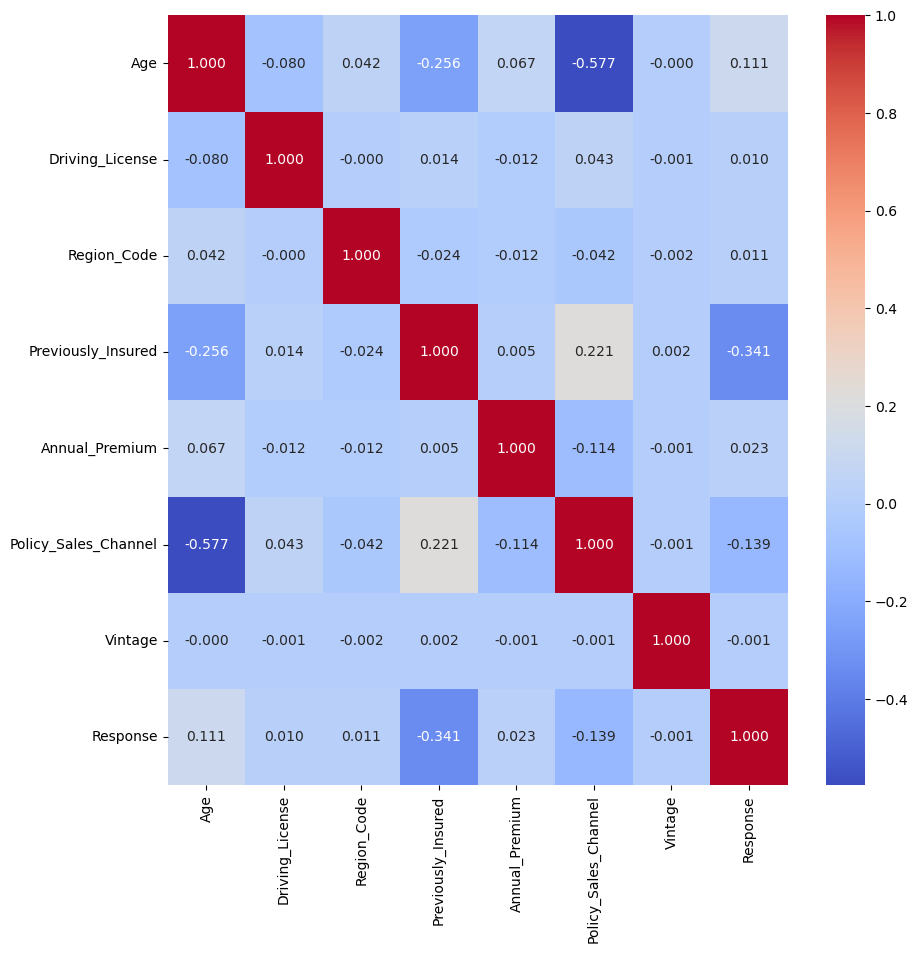

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(combined.corr(),annot=True,cmap='coolwarm',fmt='.3f');

In [28]:
# Checking for Missing Values...
combined.isna().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [29]:
# No Missing Values are there...

### Feature Engg. 

In [30]:
combined.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [31]:
# Loyalty Score...
# Create loyalty tiers based on the number of days the customer has been associated with the company
combined['Loyalty_Score'] = pd.cut(combined['Vintage'], 
                             bins=[0, 100, 200, 300], 
                             labels=['New', 'Moderate', 'Loyal'],include_lowest=True)

In [32]:
# Vehicle Damage Importance (Risky_Vehicle feature)...
# If a vehicle is older than 2 years and has been damaged, mark it as risky...
combined['Risky_Vehicle'] = np.where((combined['Vehicle_Age'] == '> 2 Years') & (combined['Vehicle_Damage'] == 1), 1, 0)

In [33]:
# Premium Affordability (Premium_Level feature)
# Categorize the annual premium into low, medium, and high based on quartiles or custom thresholds
combined['Premium_Level'] = pd.qcut(combined['Annual_Premium'], q=3, labels=['Low', 'Medium', 'High'])


In [34]:
# loyal low premium shows customers who are loyal but premium is low...
combined['Loyal_Low_Premium'] = np.where((combined['Loyalty_Score'] == 'Loyal') & (combined['Premium_Level'] == 'Low'), 1, 0)

# Risk Affluent shows a risky vehicle that have high premium level...
combined['Risk_Affluent'] = np.where((combined['Risky_Vehicle'] == 1) & (combined['Premium_Level'] == 'High'), 1, 0)

In [35]:
combined['Loyal_High_Premium'] = np.where((combined['Loyalty_Score'] == 'Loyal') & (combined['Premium_Level'] == 'High'), 1, 0)


In [36]:
train_final = combined[combined.Response.notna()]
test_final = combined[combined.Response.isna()]
train_final.shape,train.shape,test_final.shape,test.shape

((381109, 17), (381109, 12), (127037, 17), (127037, 11))

In [37]:
# for train data...
train_final['Region_Premium_mean'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('mean')
train_final['Region_Premium_median'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('median')
train_final['Region_Premium_std'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('std')
train_final['Region_Premium_min'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('min')
train_final['Region_Premium_max'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('max')

# for test data...
test_final['Region_Premium_mean'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('mean')
test_final['Region_Premium_median'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('median')
test_final['Region_Premium_std'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('std')
test_final['Region_Premium_min'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('min')
test_final['Region_Premium_max'] = train_final.groupby(by='Region_Code')['Annual_Premium'].transform('max')


In [38]:
# for train data...
train_final['Region_Vintage_mean'] = train_final.groupby(by='Region_Code')['Vintage'].transform('mean')
train_final['Region_Vintage_median'] = train_final.groupby(by='Region_Code')['Vintage'].transform('median')
train_final['Region_Vintage_std'] = train_final.groupby(by='Region_Code')['Vintage'].transform('std')
train_final['Region_Vintage_min'] = train_final.groupby(by='Region_Code')['Vintage'].transform('min')
train_final['Region_Vintage_max'] = train_final.groupby(by='Region_Code')['Vintage'].transform('max')

# for test data...
test_final['Region_Vintage_mean'] = train_final.groupby(by='Region_Code')['Vintage'].transform('mean')
test_final['Region_Vintage_median'] = train_final.groupby(by='Region_Code')['Vintage'].transform('median')
test_final['Region_Vintage_std'] = train_final.groupby(by='Region_Code')['Vintage'].transform('std')
test_final['Region_Vintage_min'] = train_final.groupby(by='Region_Code')['Vintage'].transform('min')
test_final['Region_Vintage_max'] = train_final.groupby(by='Region_Code')['Vintage'].transform('max')


In [39]:
# for train data...
train_final['Region_Age_mean'] = train_final.groupby(by='Region_Code')['Age'].transform('mean')
train_final['Region_Age_median'] = train_final.groupby(by='Region_Code')['Age'].transform('median')
train_final['Region_Age_std'] = train_final.groupby(by='Region_Code')['Age'].transform('std')
train_final['Region_Age_min'] = train_final.groupby(by='Region_Code')['Age'].transform('min')
train_final['Region_Age_max'] = train_final.groupby(by='Region_Code')['Age'].transform('max')

# for test data...
test_final['Region_Age_mean'] = train_final.groupby(by='Region_Code')['Age'].transform('mean')
test_final['Region_Age_median'] = train_final.groupby(by='Region_Code')['Age'].transform('median')
test_final['Region_Age_std'] = train_final.groupby(by='Region_Code')['Age'].transform('std')
test_final['Region_Age_min'] = train_final.groupby(by='Region_Code')['Age'].transform('min')
test_final['Region_Age_max'] = train_final.groupby(by='Region_Code')['Age'].transform('max')


In [40]:
train_final['Vintage_Category'] = pd.cut(train_final['Vintage'], bins=[0, 100, 200, 300], labels=['New', 'Moderate', 'Loyal'],include_lowest=True)

test_final['Vintage_Category'] = pd.cut(test_final['Vintage'], bins=[0, 100, 200, 300], labels=['New', 'Moderate', 'Loyal'],include_lowest=True)

In [41]:
train_final['premium_diff_from_region_mean'] = train_final['Annual_Premium'] - train_final['Region_Premium_mean']

test_final['premium_diff_from_region_mean'] = test_final['Annual_Premium'] - test_final['Region_Premium_mean']

In [42]:
# for train data...
train_final['Policy_Channel_Annual_Premium_mean'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('mean')
train_final['Policy_Channel_Annual_Premium_median'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('median')
train_final['Policy_Channel_Annual_Premium_min'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('min')
train_final['Policy_Channel_Annual_Premium_max'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('max')

# for test data...
test_final['Policy_Channel_Annual_Premium_mean'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('mean')
test_final['Policy_Channel_Annual_Premium_median'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('median')
test_final['Policy_Channel_Annual_Premium_min'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('min')
test_final['Policy_Channel_Annual_Premium_max'] = train_final.groupby(by='Policy_Sales_Channel')['Annual_Premium'].transform('max')


In [43]:
train_final['High_Premium_Channel'] = np.where(train_final['Annual_Premium'] > train_final['Policy_Channel_Annual_Premium_median'], 1, 0)

test_final['High_Premium_Channel'] = np.where(test_final['Annual_Premium'] > test_final['Policy_Channel_Annual_Premium_median'], 1, 0)

In [44]:
train_final['Channel_Popularity'] = train_final['Policy_Sales_Channel'].map(train_final['Policy_Sales_Channel'].value_counts())

test_final['Channel_Popularity'] = test_final['Policy_Sales_Channel'].map(train_final['Policy_Sales_Channel'].value_counts())


In [45]:
train_final['Policy_channel_avg_age'] = train_final.groupby(by='Policy_Sales_Channel')['Age'].transform('mean')

test_final['Policy_channel_avg_age'] = train_final.groupby(by='Policy_Sales_Channel')['Age'].transform('mean')

#### Lets visualise the Annual Premium and visualise the log transformed variable....

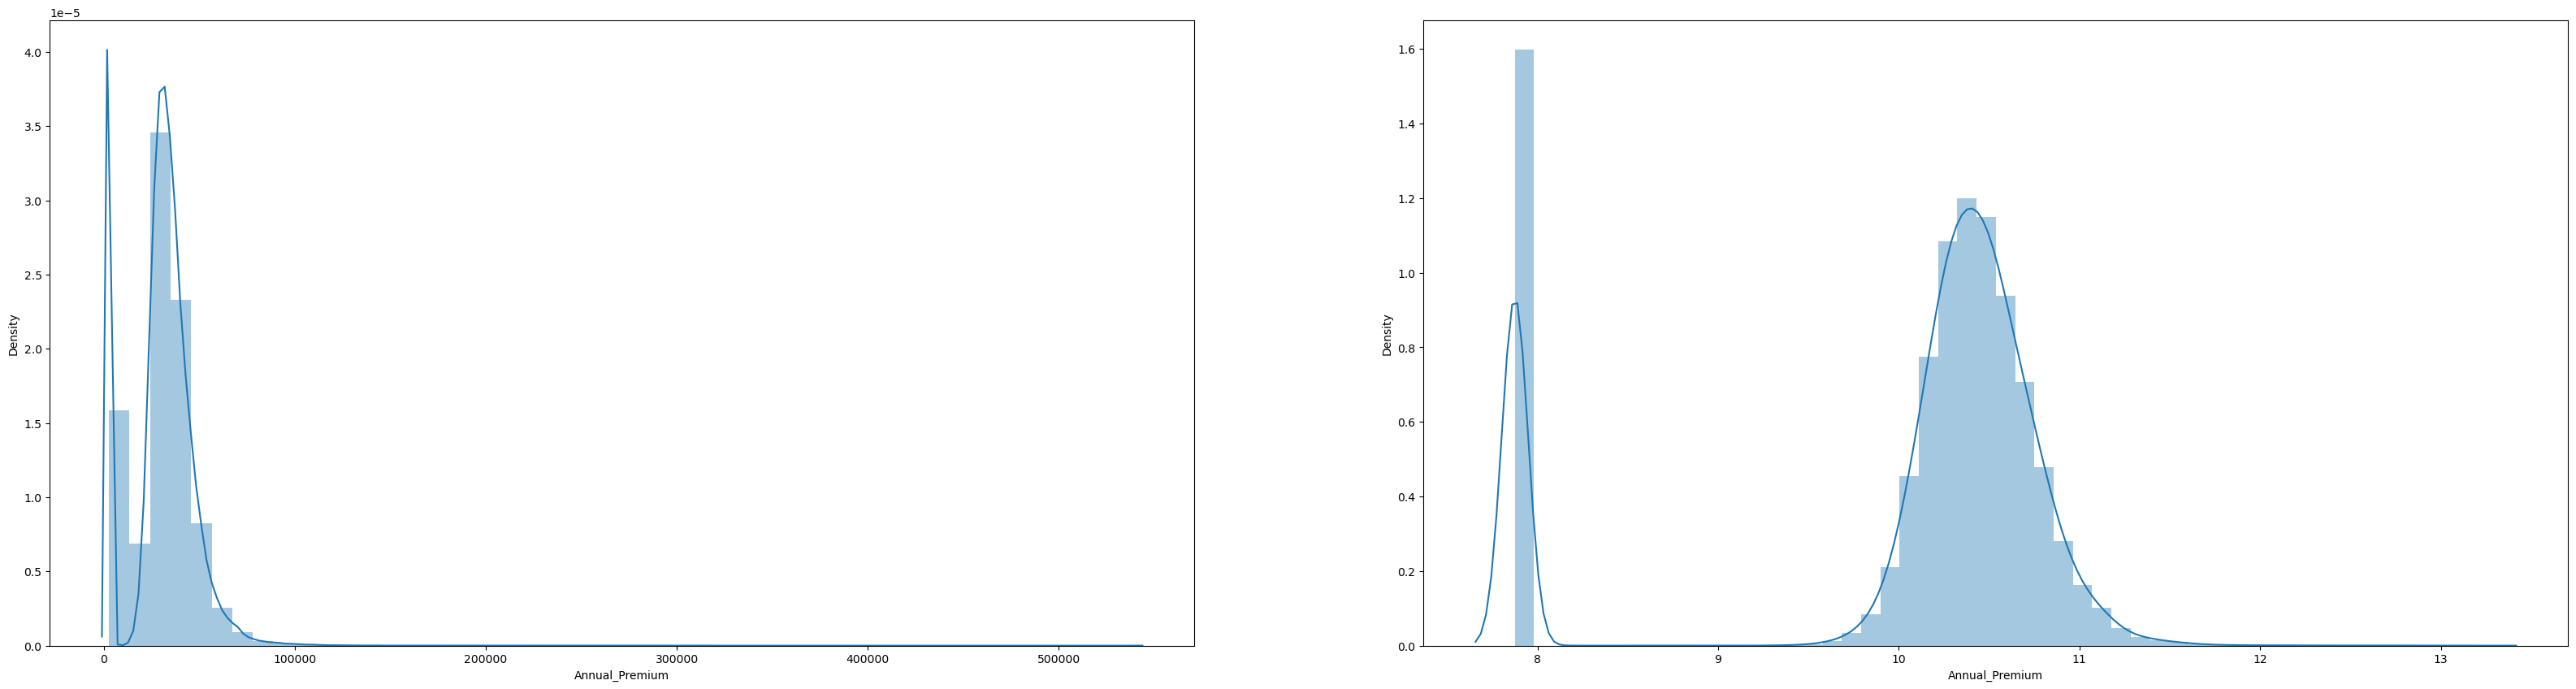

In [46]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (40,10))
axx = ax.flatten()
sns.distplot(combined['Annual_Premium'],ax=axx[0]);
sns.distplot(np.log(combined['Annual_Premium']),ax=axx[1]);

In [47]:
train_final['Annual_Premium'] = np.log(train_final.Annual_Premium)

test_final['Annual_Premium'] = np.log(test_final.Annual_Premium)

In [48]:
pd.set_option('display.max_columns',50)

In [49]:
train_final.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Loyalty_Score,Risky_Vehicle,Premium_Level,Loyal_Low_Premium,Risk_Affluent,Loyal_High_Premium,Region_Premium_mean,Region_Premium_median,Region_Premium_std,Region_Premium_min,Region_Premium_max,Region_Vintage_mean,Region_Vintage_median,Region_Vintage_std,Region_Vintage_min,Region_Vintage_max,Region_Age_mean,Region_Age_median,Region_Age_std,Region_Age_min,Region_Age_max,Vintage_Category,premium_diff_from_region_mean,Policy_Channel_Annual_Premium_mean,Policy_Channel_Annual_Premium_median,Policy_Channel_Annual_Premium_min,Policy_Channel_Annual_Premium_max,High_Premium_Channel,Channel_Popularity,Policy_channel_avg_age
0,Male,44,1,28.0,0,> 2 Years,Yes,10.607921,26.0,217,1.0,Loyal,0,High,0,0,1,38668.865245,38702.0,18757.537720,2630.0,540165.0,154.396965,155.0,83.711155,10,299,46.256853,45.0,14.539097,20,85,Loyal,1785.134755,33654.241355,34613.0,2630.0,540165.0,1,79700,50.683413
1,Male,76,1,3.0,0,1-2 Year,No,10.420375,26.0,183,0.0,Moderate,0,Medium,0,0,0,24524.480813,26143.0,14165.071245,2630.0,171264.0,155.211437,155.0,82.724924,10,299,36.838936,32.0,14.813785,20,82,Moderate,9011.519187,33654.241355,34613.0,2630.0,540165.0,0,79700,50.683413
2,Male,47,1,28.0,0,> 2 Years,Yes,10.553049,26.0,27,1.0,New,0,High,0,0,0,38668.865245,38702.0,18757.537720,2630.0,540165.0,154.396965,155.0,83.711155,10,299,46.256853,45.0,14.539097,20,85,New,-374.865245,33654.241355,34613.0,2630.0,540165.0,1,79700,50.683413
3,Male,21,1,11.0,1,< 1 Year,No,10.261826,152.0,203,0.0,Loyal,0,Medium,0,0,0,27607.283146,29128.0,13890.778824,2630.0,144074.0,154.607777,154.0,83.578555,10,299,34.374567,27.0,14.033221,20,82,Loyal,1011.716854,30889.192493,30756.0,2630.0,495106.0,0,134784,26.214825
4,Female,29,1,41.0,1,< 1 Year,No,10.221796,152.0,39,0.0,New,0,Medium,0,0,0,30949.127471,31672.0,14902.658393,2630.0,339396.0,154.933089,154.0,83.717828,10,299,36.451185,30.0,14.473849,20,83,New,-3453.127471,30889.192493,30756.0,2630.0,495106.0,0,134784,26.214825


In [50]:
train_final.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Loyalty_Score',
       'Risky_Vehicle', 'Premium_Level', 'Loyal_Low_Premium', 'Risk_Affluent',
       'Loyal_High_Premium', 'Region_Premium_mean', 'Region_Premium_median',
       'Region_Premium_std', 'Region_Premium_min', 'Region_Premium_max',
       'Region_Vintage_mean', 'Region_Vintage_median', 'Region_Vintage_std',
       'Region_Vintage_min', 'Region_Vintage_max', 'Region_Age_mean',
       'Region_Age_median', 'Region_Age_std', 'Region_Age_min',
       'Region_Age_max', 'Vintage_Category', 'premium_diff_from_region_mean',
       'Policy_Channel_Annual_Premium_mean',
       'Policy_Channel_Annual_Premium_median',
       'Policy_Channel_Annual_Premium_min',
       'Policy_Channel_Annual_Premium_max', 'High_Premium_Channel',
       'Channel_Popularity', 'Policy_channel_avg_age'],
      dtype='

In [51]:
nums = ['Age', 'Annual_Premium','Vintage','Region_Premium_mean', 'Region_Premium_median',
       'Region_Premium_std', 'Region_Premium_min', 'Region_Premium_max',
       'Region_Vintage_mean', 'Region_Vintage_median', 'Region_Vintage_std',
       'Region_Vintage_min', 'Region_Vintage_max', 'Region_Age_mean',
       'Region_Age_median', 'Region_Age_std', 'Region_Age_min',
       'Region_Age_max', 'premium_diff_from_region_mean',\
       'Policy_Channel_Annual_Premium_mean',
       'Policy_Channel_Annual_Premium_median',
       'Policy_Channel_Annual_Premium_min',
       'Policy_Channel_Annual_Premium_max',
       'Channel_Popularity', 'Policy_channel_avg_age']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age',\
        'Vehicle_Damage','Policy_Sales_Channel', 'Response', 'Loyalty_Score','Risky_Vehicle',\
        'Premium_Level','Loyal_Low_Premium','Risk_Affluent','Loyal_High_Premium','Vintage_Category','High_Premium_Channel']

In [52]:
for i in nums:
    pvalue = stats.shapiro(train_final[i])[1]
    if pvalue>0.05:
        print('Ho: Data is Normal',i,'pvalue is',pvalue)
    else:
        print('Ha: Data is not Normal',i,'pvalue is',pvalue)

Ha: Data is not Normal Age pvalue is 0.0
Ha: Data is not Normal Annual_Premium pvalue is 0.0
Ha: Data is not Normal Vintage pvalue is 0.0
Ha: Data is not Normal Region_Premium_mean pvalue is 0.0
Ha: Data is not Normal Region_Premium_median pvalue is 0.0
Ha: Data is not Normal Region_Premium_std pvalue is 0.0
Ho: Data is Normal Region_Premium_min pvalue is 1.0
Ha: Data is not Normal Region_Premium_max pvalue is 0.0
Ha: Data is not Normal Region_Vintage_mean pvalue is 0.0
Ha: Data is not Normal Region_Vintage_median pvalue is 0.0
Ha: Data is not Normal Region_Vintage_std pvalue is 0.0
Ha: Data is not Normal Region_Vintage_min pvalue is 0.0
Ha: Data is not Normal Region_Vintage_max pvalue is 0.0
Ha: Data is not Normal Region_Age_mean pvalue is 0.0
Ha: Data is not Normal Region_Age_median pvalue is 0.0
Ha: Data is not Normal Region_Age_std pvalue is 0.0
Ha: Data is not Normal Region_Age_min pvalue is 0.0
Ha: Data is not Normal Region_Age_max pvalue is 0.0
Ha: Data is not Normal premium_dif

In [53]:
from scipy.stats import mannwhitneyu

for var in nums:
    
    group1 = train_final[train_final['Response'] == 0][var] 
    group2 = train_final[train_final['Response'] == 1][var] 
    # Perform the Mann-Whitney U Test
    u_stat, p_val = mannwhitneyu(group1, group2)

    # Print the result for each variable
    print(f'P_value for {var} is {p_val}')

P_value for Age is 0.0
P_value for Annual_Premium is 9.141297555609242e-98
P_value for Vintage is 0.516300989577035
P_value for Region_Premium_mean is 0.0
P_value for Region_Premium_median is 0.0
P_value for Region_Premium_std is 0.0
P_value for Region_Premium_min is 1.0
P_value for Region_Premium_max is 0.0
P_value for Region_Vintage_mean is 0.07813702402527395
P_value for Region_Vintage_median is 9.583944707741747e-228
P_value for Region_Vintage_std is 0.4976047188634317
P_value for Region_Vintage_min is 0.0033604323049386637
P_value for Region_Vintage_max is 0.20908884719642928
P_value for Region_Age_mean is 0.0
P_value for Region_Age_median is 0.0
P_value for Region_Age_std is 9.411170439099902e-29
P_value for Region_Age_min is 5.37306372801545e-07
P_value for Region_Age_max is 0.0
P_value for premium_diff_from_region_mean is 7.844056388718354e-16
P_value for Policy_Channel_Annual_Premium_mean is 0.0
P_value for Policy_Channel_Annual_Premium_median is 0.0
P_value for Policy_Channel

In [54]:
stats.ttest_ind(train_final['Region_Premium_min'],train_final['Response'])

Ttest_indResult(statistic=4950753.781815238, pvalue=0.0)

In [55]:
# Ho: Columns are not significant
# Ha: Columns are significant

for column in cats:
    contingency_table = pd.crosstab(train_final[column], train_final['Response'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}: p-value = {p_value} ,:variable not out= {p_value<0.05}")

Chi-square test for Gender: p-value = 7.665800628415621e-230 ,:variable not out= True
Chi-square test for Driving_License: p-value = 5.111753504019177e-10 ,:variable not out= True
Chi-square test for Region_Code: p-value = 0.0 ,:variable not out= True
Chi-square test for Previously_Insured: p-value = 0.0 ,:variable not out= True
Chi-square test for Vehicle_Age: p-value = 0.0 ,:variable not out= True
Chi-square test for Vehicle_Damage: p-value = 0.0 ,:variable not out= True
Chi-square test for Policy_Sales_Channel: p-value = 0.0 ,:variable not out= True
Chi-square test for Response: p-value = 0.0 ,:variable not out= True
Chi-square test for Loyalty_Score: p-value = 0.9916061791606894 ,:variable not out= False
Chi-square test for Risky_Vehicle: p-value = 1.0 ,:variable not out= False
Chi-square test for Premium_Level: p-value = 2.9084034797248814e-147 ,:variable not out= True
Chi-square test for Loyal_Low_Premium: p-value = 3.161183729589183e-10 ,:variable not out= True
Chi-square test f

In [56]:
train_final.shape

(381109, 41)

In [57]:
train_data = train_final.drop(columns=['Vintage','premium_diff_from_region_mean','Loyalty_Score','Risky_Vehicle','Risk_Affluent',\
                                      'Region_Premium_min','Region_Vintage_mean','Region_Vintage_std','Region_Vintage_max','Vintage_Category',\
                                      'Policy_Channel_Annual_Premium_min'])

test_data = test_final.drop(columns=['Vintage','premium_diff_from_region_mean','Loyalty_Score','Risky_Vehicle','Risk_Affluent',\
                                    'Region_Premium_min','Region_Vintage_mean','Region_Vintage_std','Region_Vintage_max','Vintage_Category',\
                                    'Policy_Channel_Annual_Premium_min'])

train_data.shape , test_data.shape ,train.shape,test.shape

((381109, 30), (127037, 30), (381109, 12), (127037, 11))

In [58]:
train_data['Vehicle_Age'] = train_data['Vehicle_Age'].map({'> 2 Years':2, '1-2 Year':1, '< 1 Year':0})
test_data['Vehicle_Age'] = test_data['Vehicle_Age'].map({'> 2 Years':2, '1-2 Year':1, '< 1 Year':0})

In [59]:
# dummyfy the train and test data...
train_data_dummy = pd.get_dummies(train_data,drop_first=True)
test_data_dummy = pd.get_dummies(test_data,drop_first=True)

In [60]:
train_data_dummy.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Response,Loyal_Low_Premium,Loyal_High_Premium,Region_Premium_mean,Region_Premium_median,Region_Premium_std,Region_Premium_max,Region_Vintage_median,Region_Vintage_min,Region_Age_mean,Region_Age_median,Region_Age_std,Region_Age_min,Region_Age_max,Policy_Channel_Annual_Premium_mean,Policy_Channel_Annual_Premium_median,Policy_Channel_Annual_Premium_max,High_Premium_Channel,Channel_Popularity,Policy_channel_avg_age,Gender_Male,Vehicle_Damage_Yes,Premium_Level_Medium,Premium_Level_High
0,44,1,28.0,0,2,10.607921,26.0,1.0,0,1,38668.865245,38702.0,18757.537720,540165.0,155.0,10,46.256853,45.0,14.539097,20,85,33654.241355,34613.0,540165.0,1,79700,50.683413,1,1,0,1
1,76,1,3.0,0,1,10.420375,26.0,0.0,0,0,24524.480813,26143.0,14165.071245,171264.0,155.0,10,36.838936,32.0,14.813785,20,82,33654.241355,34613.0,540165.0,0,79700,50.683413,1,0,1,0
2,47,1,28.0,0,2,10.553049,26.0,1.0,0,0,38668.865245,38702.0,18757.537720,540165.0,155.0,10,46.256853,45.0,14.539097,20,85,33654.241355,34613.0,540165.0,1,79700,50.683413,1,1,0,1
3,21,1,11.0,1,0,10.261826,152.0,0.0,0,0,27607.283146,29128.0,13890.778824,144074.0,154.0,10,34.374567,27.0,14.033221,20,82,30889.192493,30756.0,495106.0,0,134784,26.214825,1,0,1,0
4,29,1,41.0,1,0,10.221796,152.0,0.0,0,0,30949.127471,31672.0,14902.658393,339396.0,154.0,10,36.451185,30.0,14.473849,20,83,30889.192493,30756.0,495106.0,0,134784,26.214825,0,0,1,0


In [61]:
del test_data_dummy['Response']

In [62]:
x = train_data_dummy.drop(columns='Response')
y = train_data_dummy['Response']

In [63]:
trainx,testx,trainy,testy=train_test_split(x,y,random_state=10,train_size=0.80)

In [64]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((304887, 30), (76222, 30), (304887,), (76222,))

In [65]:
gbm = GradientBoostingClassifier()
gbm.fit(trainx,trainy)
pred = gbm.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

0.8579387475758445

In [66]:
gbm = GradientBoostingClassifier(n_estimators=700,max_depth=5)
gbm.fit(trainx,trainy)
pred = gbm.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

KeyboardInterrupt: 

In [ ]:
xgb = XGBClassifier()
xgb.fit(trainx,trainy)
pred = xgb.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

In [ ]:
xgb = XGBClassifier(n_estimator=500,max_depth=3)
xgb.fit(trainx,trainy)
pred = xgb.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

In [ ]:
rf = RandomForestClassifier(n_estimators=800,max_depth=3,n_jobs=-1,random_state=10,warm_start=True)
rf.fit(trainx,trainy)
pred = rf.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(trainx,trainy)
pred = ada.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

In [ ]:
lg = LogisticRegression()
lg.fit(trainx,trainy)
pred = lg.predict_proba(testx)[:,1]
roc_auc_score(testy,pred)

In [ ]:
GBM = GradientBoostingClassifier()
XGB = XGBClassifier(n_estimator=500,max_depth=3)
ADA = AdaBoostClassifier()
RF = RandomForestClassifier(n_estimators=800,max_depth=10,n_jobs=-1,random_state=10)


base_estimators = [('GBM',GBM),('XGB',RF),('ADA',XGB)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=ADA,cv=5)

pred_stack1 = stack.fit(trainx,trainy).predict_proba(testx)[:,1]
roc_auc_score(testy,pred_stack1)

In [ ]:
GBM = GradientBoostingClassifier()
XGB = XGBClassifier(n_estimator=500,max_depth=3)
ADA = AdaBoostClassifier()
RF = RandomForestClassifier(n_estimators=500,max_depth=10,n_jobs=-1,random_state=10)


base_estimators = [('GBM',GBM),('RF',RF),('ADA',ADA)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=XGB,cv=5)

pred_stack = stack.fit(x,y).predict_proba(test_data_dummy)[:,1]

In [ ]:
xgb = XGBClassifier(n_estimator=500,max_depth=3)
pred_xgb = xgb.fit(x,y).predict_proba(test_data_dummy)[:,-1]

In [ ]:
sub = pd.read_csv('sample_submission_iA3afxn.csv')
sub['Response'] = pred_stack
sub.to_csv('submission_xgb.csv',index=False)

In [ ]:
sub

## END